**# IMDb MOVIE REVIEWS PROJECT**

In [1]:
# Import necesary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import requests

**Step 1: Webpage Request**

In [2]:
# Fetching movies list from the IMDB website 
moviesurl = "https://www.imdb.com/search/title/?title_type=feature"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# Request to fetch the data from the URL
pgrequest = requests.get(moviesurl, headers=headers) 
if pgrequest.status_code == 200:
    print(f"Webpage was successfully fetched. STATUS CODE: {pgrequest.status_code}")
else:
    print(f"Error in retrieving the webpage. STATUS CODE: {pgrequest.status_code}")


Webpage was successfully fetched. STATUS CODE: 200


**Step 2: Parsing the HTML data content**
- Using beautifulsoup for webscrapping

In [3]:
soup = BeautifulSoup(pgrequest.text, 'html.parser')
print(type(soup))
#print(soup.prettify())

<class 'bs4.BeautifulSoup'>


In [4]:
# scrapped movie names
movies = soup.find_all("li", class_="ipc-metadata-list-summary-item")
print(f"Total number of movies found: {len(movies)}")

Total number of movies found: 25


**Step 3:Extract the movie details**

In [5]:
# Initialize the list
movies_data = []
# Iterating through each movie and getting relevant details
for movie in movies:
    title = movie.find('h3', class_="ipc-title__text").text.split('.')[1]   
    year = movie.find("div", class_="sc-732ea2d-5 kHnTQb dli-title-metadata").find_all('span')[0].text    
    duration = movie.find("div", class_="sc-732ea2d-5 kHnTQb dli-title-metadata").find_all('span')[1].text 
    film_rating = movie.find("div", class_="sc-732ea2d-5 kHnTQb dli-title-metadata").find_all('span')[2].text 
    star_rating = movie.find("span", class_="ipc-rating-star--rating").text if movie.find("span", class_="ipc-rating-star--rating") else np.nan
    voteCount = movie.find("span", class_="ipc-rating-star--voteCount").text if movie.find("span", class_="ipc-rating-star--voteCount") else np.nan
    metascore = movie.find("span", class_="sc-b0901df4-0 bXIOoL metacritic-score-box").text if movie.find("span", class_="sc-b0901df4-0 bXIOoL metacritic-score-box") else np.nan
    description= movie.find("div", class_="ipc-html-content-inner-div").get_text(strip=True) if movie.find("div", class_="ipc-html-content-inner-div") else np.nan
    
    movies_data.append({
        "Movie Title": title,
        "Release Year": year,
        "Movie Duration":duration,
        "MPA Rating":film_rating,
        "Audience Rating":star_rating,
        "Audience Votes":voteCount,
        "Metascore":metascore,
        "Movie Description":description
    })

In [6]:
#movies_data
# Convert the movie details data into pandas dataframe
df = pd.DataFrame(movies_data)
df

,Movie Title,Release Year,Movie Duration,MPA Rating,Audience Rating,Audience Votes,Metascore,Movie Description
0,Joker: Folie à Deux,2024,2h 18m,R,5.3,(80K),45,"Struggling with his dual identity, failed come..."
1,Terrifier 3,2024,2h 5m,Not Rated,7.1,(9.3K),61,Art the Clown is set to unleash chaos on the u...
2,The Substance,2024,2h 21m,R,7.7,(57K),78,A fading celebrity takes a black-market drug: ...
3,Salem's Lot,2024,1h 54m,R,5.7,(20K),47,An author returns to his hometown of Jerusalem...
4,Beetlejuice Beetlejuice,2024,1h 45m,PG-13,6.9,(77K),62,"After a family tragedy, three generations of t..."
5,It's What's Inside,2024,1h 43m,R,6.6,(16K),57,A group of friends gather for a pre-wedding pa...
6,Deadpool & Wolverine,2024,2h 8m,R,7.8,(337K),56,Deadpool is offered a place in the Marvel Cine...
7,Speak No Evil,2024,1h 50m,R,6.9,(44K),66,A family is invited to spend a whole weekend i...
8,The Platform 2,2024,1h 39m,TV-MA,5.0,(23K),45,A thrilling physical journey that allows an ap...
9,Megalopolis,2024,2h 18m,R,5.0,(15K),55,The city of New Rome faces the duel between Ce...


In [7]:
df.to_csv('IMDB_Scrappedmovies.csv', index=False) 
print("Initial scrapped movies data saved in CSV format")

Initial scrapped movies data saved in CSV format


**Step 4: Data Cleaning**
- Check for None or NaN value: need to amend the **None** value
- Check for missing values
- Check for duplicate movie name entry, & maybe movie description! (only work for movie title; rest field can have same/duplicate values)
- Audience Votes column has brackets: need to remove the brackets from the values

In [8]:
# Count None values per row
# This should also give us missing values/ null values OR else could use df.isnull function
nan_counts = df.isna().sum(axis=1)
print(f"Total number of NaN values:\n {df.isna().sum()}") 

Total number of NaN values:
 Movie Title          0
Release Year         0
Movie Duration       0
MPA Rating           0
Audience Rating      0
Audience Votes       0
Metascore            1
Movie Description    0
dtype: int64


In [9]:
duplicates = df.duplicated(keep=False)
df.duplicated().sum()
print(f"There are {df.duplicated().sum()} duplicate entries.")

There are 0 duplicate entries.


In [10]:
duplicates_movie_title = df['Movie Title'].duplicated(keep=False)
duplicates_movie_description = df['Movie Description'].duplicated(keep=False)
print(f"There are {duplicates_movie_title.sum()} duplicates in Movie Title column, and {duplicates_movie_description.sum()} duplicates in Movie description column.")

There are 0 duplicates in Movie Title column, and 0 duplicates in Movie description column.


In [11]:
# N/A or non-available metascores are assigned integer value 0
df['Metascore'] = df['Metascore'].map(lambda x: 0 if x is None else x)
# Metascore has 'Nonetype' attribute: Converting it into numeric integer value for future use
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce').fillna(0).astype(int)

In [12]:
# Removing the brackets from elements of Audience Votes column
df['Audience Votes'] = df['Audience Votes'].str.replace(r'[\[\]\(\)]', '', regex=True)
df

,Movie Title,Release Year,Movie Duration,MPA Rating,Audience Rating,Audience Votes,Metascore,Movie Description
0,Joker: Folie à Deux,2024,2h 18m,R,5.3,80K,45,"Struggling with his dual identity, failed come..."
1,Terrifier 3,2024,2h 5m,Not Rated,7.1,9.3K,61,Art the Clown is set to unleash chaos on the u...
2,The Substance,2024,2h 21m,R,7.7,57K,78,A fading celebrity takes a black-market drug: ...
3,Salem's Lot,2024,1h 54m,R,5.7,20K,47,An author returns to his hometown of Jerusalem...
4,Beetlejuice Beetlejuice,2024,1h 45m,PG-13,6.9,77K,62,"After a family tragedy, three generations of t..."
5,It's What's Inside,2024,1h 43m,R,6.6,16K,57,A group of friends gather for a pre-wedding pa...
6,Deadpool & Wolverine,2024,2h 8m,R,7.8,337K,56,Deadpool is offered a place in the Marvel Cine...
7,Speak No Evil,2024,1h 50m,R,6.9,44K,66,A family is invited to spend a whole weekend i...
8,The Platform 2,2024,1h 39m,TV-MA,5.0,23K,45,A thrilling physical journey that allows an ap...
9,Megalopolis,2024,2h 18m,R,5.0,15K,55,The city of New Rome faces the duel between Ce...


**Step 5: Data Transformation**
- Convert movie duration to minutes
- Convert Audience Votes to numeric format (by removing 'K' and 'M')
- Handle missing data by filling the values with relevent values
- Tokenize the movie description for sentiment analysis (I will use Textblob library) 

In [13]:
def convert_duration_to_minutes(duration):
    if isinstance(duration, str):
        parts = duration.split()
        hours = int(parts[0][:-1])  # Remove 'h' and convert to int
        minutes = int(parts[1][:-1])  # Remove 'm' and convert to int
        return hours * 60 + minutes
    return None
df['Movie Duration'] = df['Movie Duration'].apply(convert_duration_to_minutes)
df.head()

,Movie Title,Release Year,Movie Duration,MPA Rating,Audience Rating,Audience Votes,Metascore,Movie Description
0,Joker: Folie à Deux,2024,138,R,5.3,80K,45,"Struggling with his dual identity, failed come..."
1,Terrifier 3,2024,125,Not Rated,7.1,9.3K,61,Art the Clown is set to unleash chaos on the u...
2,The Substance,2024,141,R,7.7,57K,78,A fading celebrity takes a black-market drug: ...
3,Salem's Lot,2024,114,R,5.7,20K,47,An author returns to his hometown of Jerusalem...
4,Beetlejuice Beetlejuice,2024,105,PG-13,6.9,77K,62,"After a family tragedy, three generations of t..."


In [14]:
# Clean Audience Votes: Remove non-numeric characters (like 'K' for thousands) and convert to numeric
def convert_audience_votes(votes):
    if isinstance(votes, str):
        votes = votes.strip().upper()  # Remove spaces and standardize to uppercase
        if 'K' in votes:
            votes = votes.replace('K', '')
            return float(votes) * 1000  # Convert 'K' to thousands
        elif 'M' in votes:
            votes = votes.replace('M', '')
            return float(votes) * 1000000  # Convert 'M' to millions
        else:
            # Remove any other non-numeric characters and convert to numeric
            votes = votes.replace(',', '').replace(' ', '')  
    return pd.to_numeric(votes, errors='coerce')  # Handle other cases like plain numbers

# Apply this function to the 'Audience Votes' column
df['Audience Votes'] = df['Audience Votes'].apply(convert_audience_votes)
df.head()

,Movie Title,Release Year,Movie Duration,MPA Rating,Audience Rating,Audience Votes,Metascore,Movie Description
0,Joker: Folie à Deux,2024,138,R,5.3,80000.0,45,"Struggling with his dual identity, failed come..."
1,Terrifier 3,2024,125,Not Rated,7.1,9300.0,61,Art the Clown is set to unleash chaos on the u...
2,The Substance,2024,141,R,7.7,57000.0,78,A fading celebrity takes a black-market drug: ...
3,Salem's Lot,2024,114,R,5.7,20000.0,47,An author returns to his hometown of Jerusalem...
4,Beetlejuice Beetlejuice,2024,105,PG-13,6.9,77000.0,62,"After a family tragedy, three generations of t..."


**Step 6: Tokenization**
- Tokenize movie description for future analysis.
- Future reference: Perform sentiment analysis to describe mood (liveliness, neutral, gloomy) of the movie

In [15]:
# Defining a custom tokenzier that removes duplicates 
def customtokenizer(text):
    # Lowercase the text
    text = text.lower()
    
    # Removing punctuation marks.
    punctuation = ['!', '.', ',', '?', ';', ':', '-', '(', ')', '[', ']', '{', '}', "'", '"']
    # Loop through each punctuation character and replace it with an empty string
    for p in punctuation:
        text = text.replace(p, "")    
    tokens = text.split()

    # Remove duplicates while preserving order
    seenwords = set()
    tokens2 = [token for token in tokens if not (token in seenwords or seenwords.add(token))]

    return tokens2    

In [16]:
# Applying the custom tokenizer to the Movie Description column in df
df['Tokens'] = df['Movie Description'].apply(customtokenizer)
df.head()

,Movie Title,Release Year,Movie Duration,MPA Rating,Audience Rating,Audience Votes,Metascore,Movie Description,Tokens
0,Joker: Folie à Deux,2024,138,R,5.3,80000.0,45,"Struggling with his dual identity, failed come...","[struggling, with, his, dual, identity, failed..."
1,Terrifier 3,2024,125,Not Rated,7.1,9300.0,61,Art the Clown is set to unleash chaos on the u...,"[art, the, clown, is, set, to, unleash, chaos,..."
2,The Substance,2024,141,R,7.7,57000.0,78,A fading celebrity takes a black-market drug: ...,"[a, fading, celebrity, takes, blackmarket, dru..."
3,Salem's Lot,2024,114,R,5.7,20000.0,47,An author returns to his hometown of Jerusalem...,"[an, author, returns, to, his, hometown, of, j..."
4,Beetlejuice Beetlejuice,2024,105,PG-13,6.9,77000.0,62,"After a family tragedy, three generations of t...","[after, a, family, tragedy, three, generations..."


In [17]:
df[['Movie Title', 'Tokens']].head()

,Movie Title,Tokens
0,Joker: Folie à Deux,"[struggling, with, his, dual, identity, failed..."
1,Terrifier 3,"[art, the, clown, is, set, to, unleash, chaos,..."
2,The Substance,"[a, fading, celebrity, takes, blackmarket, dru..."
3,Salem's Lot,"[an, author, returns, to, his, hometown, of, j..."
4,Beetlejuice Beetlejuice,"[after, a, family, tragedy, three, generations..."


**Step 7: Data Visualization**
- Relevant numeric data for comparison: Movie Duration, Audience Rating and (maybe! Audience votes)

Text(0, 0.5, 'Metascore')

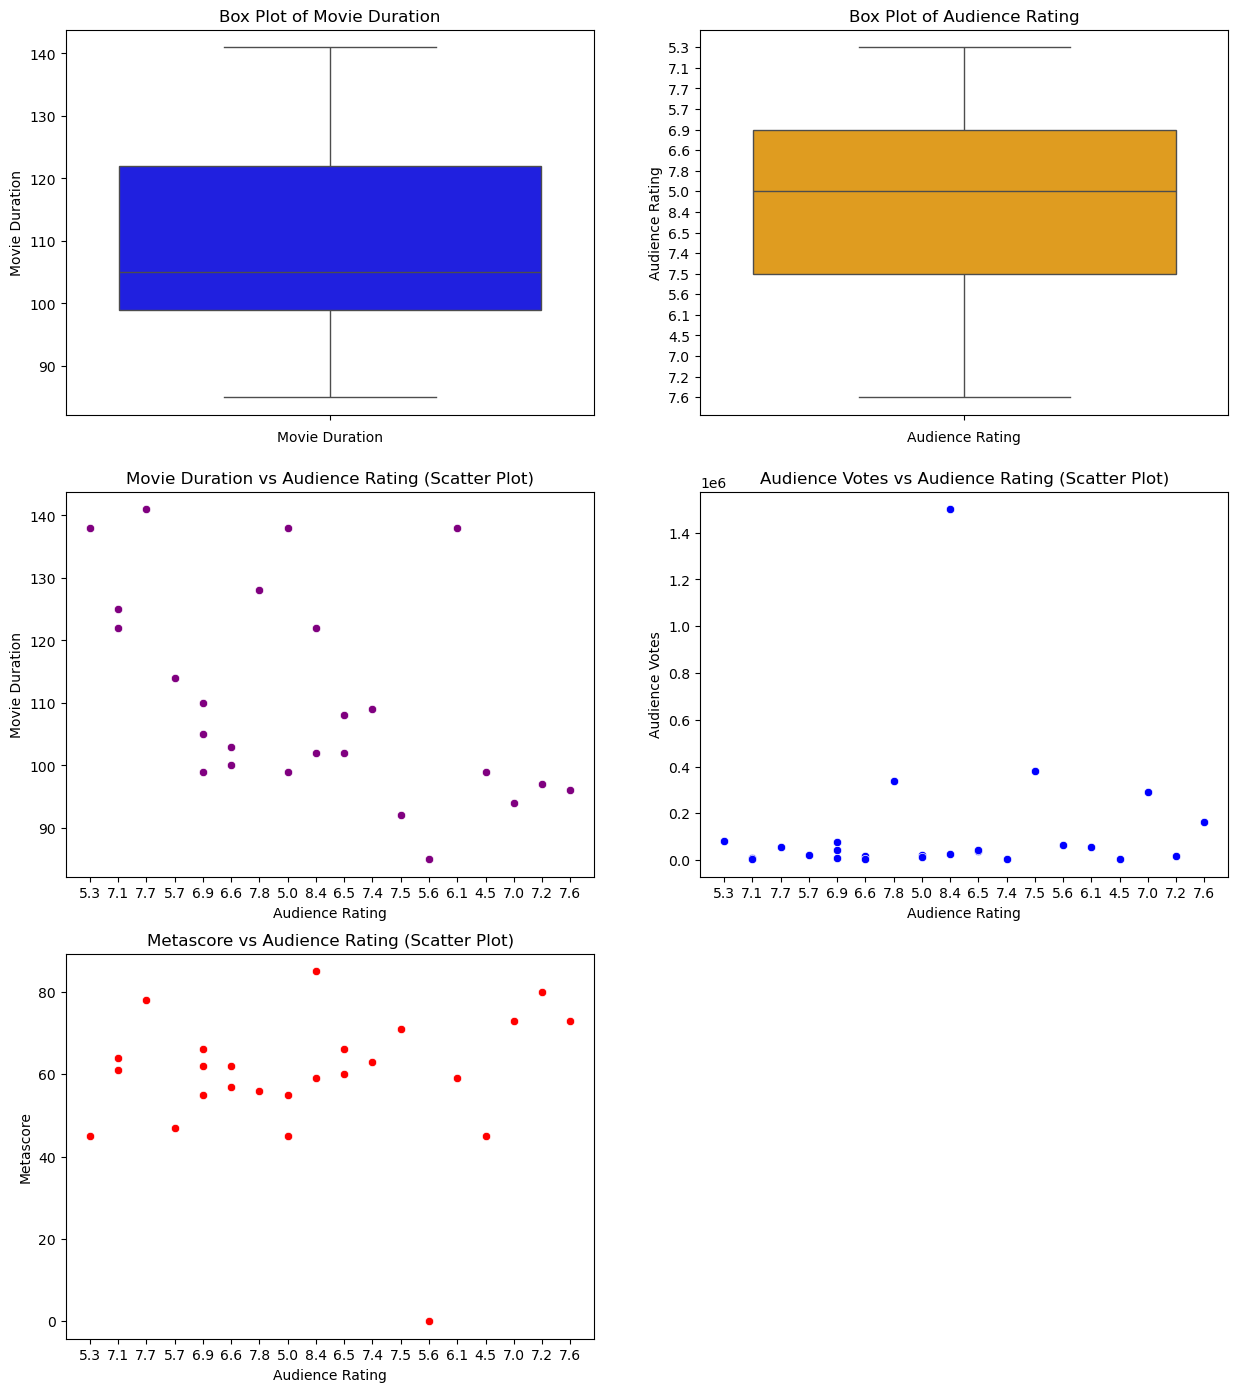

In [18]:
#Box plot
plt.figure(figsize = (15,17))

# Box plot for Movie Duration 
plt.subplot(3,2,1)
sns.boxplot(df['Movie Duration'], color = 'blue')
plt.title('Box Plot of Movie Duration')
plt.xlabel('Movie Duration')

# Box plot for Audience Rating
plt.subplot(3,2,2)
sns.boxplot(df['Audience Rating'], color = 'orange')
plt.title('Box Plot of Audience Rating')
plt.xlabel('Audience Rating')

# Scatter plot for Audience Rating and Movie Duration
plt.subplot(3, 2, 3)  
sns.scatterplot(x=df['Audience Rating'], y=df['Movie Duration'], color='purple')
plt.title('Movie Duration vs Audience Rating (Scatter Plot)')
plt.xlabel('Audience Rating')
plt.ylabel('Movie Duration')

# Scatter plot for Audience Rating and Audience Votes
plt.subplot(3, 2, 4)  
sns.scatterplot(x=df['Audience Rating'], y=df['Audience Votes'], color='blue')
plt.title('Audience Votes vs Audience Rating (Scatter Plot)')
plt.xlabel('Audience Rating')
plt.ylabel('Audience Votes')

# Scatter plot for Audience Rating and Metascore
plt.subplot(3, 2, 5)  
sns.scatterplot(x=df['Audience Rating'], y=df['Metascore'], color='red')
plt.title('Metascore vs Audience Rating (Scatter Plot)')
plt.xlabel('Audience Rating')
plt.ylabel('Metascore')

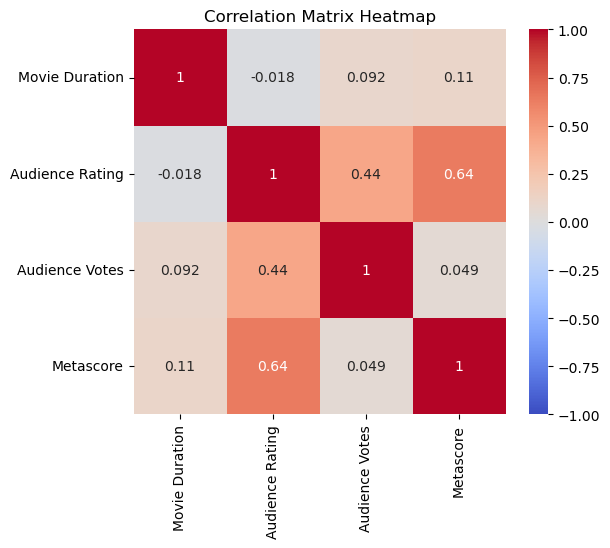

In [19]:
# Correlation Matrix Heatmap
df_reduced = df.filter(items=['Movie Duration', 'Audience Rating', 'Audience Votes', 'Metascore'])
correlation_matrix = df_reduced.corr()
plt.figure(figsize = (6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Step 8: Save the final customized data to csv file**

In [20]:
df.to_csv('IMDBmoviesfinal.csv', index=False) 
print("Final movies data saved in CSV format")

Final movies data saved in CSV format
